In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv('/IMDB Dataset.csv')[:30000]
data.head()
data=data.dropna()
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
classifier = MultinomialNB()
classifier.fit(X_train_counts, y_train)
y_pred = classifier.predict(X_test_counts)

In [51]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
negative_reviews = data[data['sentiment'] == 'negative']
positive_reviews = data[data['sentiment'] == 'positive']

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      3029
    positive       0.87      0.81      0.84      2971

    accuracy                           0.85      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.85      0.85      0.85      6000



Text(0, 0.5, 'Frequency')

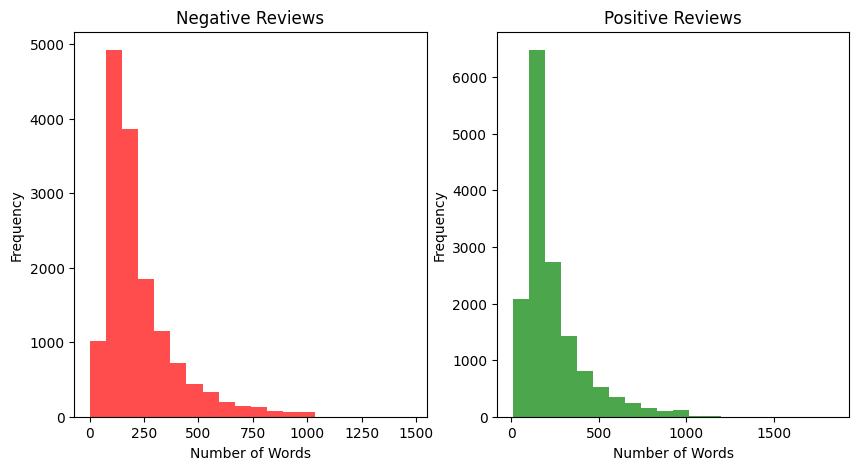

In [52]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(negative_reviews['review'].apply(lambda x: len(x.split())), bins=20, color='red', alpha=0.7)
plt.title('Negative Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(positive_reviews['review'].apply(lambda x: len(x.split())), bins=20, color='green', alpha=0.7)
plt.title('Positive Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

<Figure size 640x480 with 0 Axes>

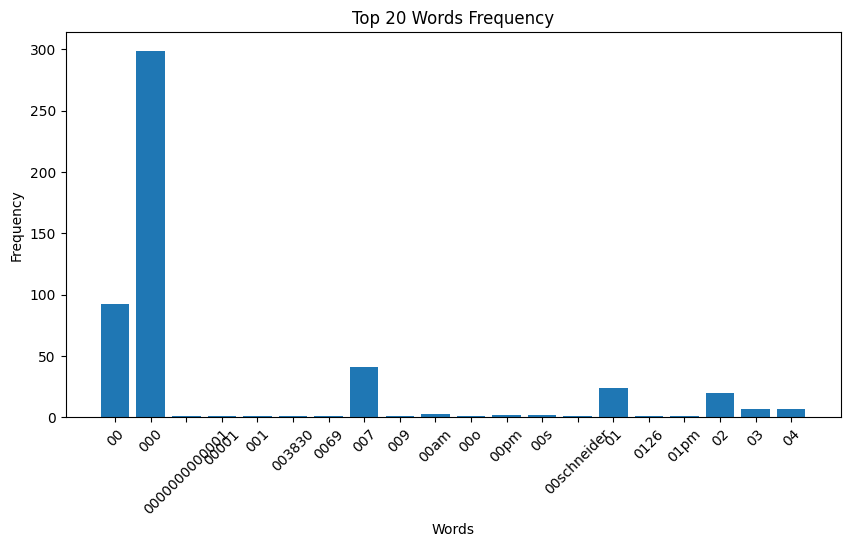

In [53]:
plt.tight_layout()
plt.show()
word_freq = X_train_counts.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

plt.figure(figsize=(10, 5))
plt.bar(words[:20], word_freq[:20])
plt.title('Top 20 Words Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()